# Necessary Libraries


In [1]:
import pandas as pd
import re
import string
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt   
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, GRU, Embedding, Dropout, Activation
from keras.layers import Bidirectional
from keras.models import Model
# from  matplotlib import pyplot as plt
from keras.utils.vis_utils import plot_model
from sklearn.metrics import confusion_matrix,f1_score, precision_score,recall_score

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)


# Reading DataSet

In [2]:
data = pd.read_csv("spam(madeof).csv",encoding = "'latin'")

In [3]:
data.head()

,v1,v2
0,ham,Subject: enron methanol ; meter # : 988291\nth...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...


In [4]:
data["spam"] = data.v1
data["text"] = data.v2

# Splitting data

In [5]:
emails_train, emails_test, target_train, target_test = train_test_split(data.text, data.spam, test_size = 0.2) 

In [6]:
data.info

<bound method DataFrame.info of         v1  ...                                               text
0      ham  ...  Subject: enron methanol ; meter # : 988291\nth...
1      ham  ...  Subject: hpl nom for january 9 , 2001\r\n( see...
2      ham  ...  Subject: neon retreat\r\nho ho ho , we ' re ar...
3     spam  ...  Subject: photoshop , windows , office . cheap ...
4      ham  ...  Subject: re : indian springs\r\nthis deal is t...
...    ...  ...                                                ...
5166   ham  ...  Subject: put the 10 on the ft\r\nthe transport...
5167   ham  ...  Subject: 3 / 4 / 2000 and following noms\r\nhp...
5168   ham  ...  Subject: calpine daily gas nomination\r\n>\r\n...
5169   ham  ...  Subject: industrial worksheets for august 2000...
5170  spam  ...  Subject: important online banking alert\r\ndea...

[5171 rows x 4 columns]>

In [7]:
emails_train.shape

(4136,)

# Preprocessing

In [8]:
def remove_hyperlink(word):
    return  re.sub(r'http\S+', '', word)

def to_lower(word):
    result = word.lower()
    return result

def remove_number(word):
    result = re.sub(r'\d+', '', word)
    return result

def remove_punctuation(word):
    result = word.translate(str.maketrans(dict.fromkeys(string.punctuation)))
    return result

def remove_whitespace(word):
    result = word.strip()
    return result

def replace_newline(word):
    return word.replace('\n','')



def clean_up_pipeline(sentence):
    cleaning_utils = [remove_hyperlink,
                      replace_newline,
                      to_lower,
                      remove_number,
                      remove_punctuation,
                      remove_whitespace]
    for o in cleaning_utils:
        sentence = o(sentence)
    return sentence

x_train = [clean_up_pipeline(o) for o in emails_train]
x_test = [clean_up_pipeline(o) for o in emails_test]

x_train[0]

'subject impress her with a hard erection    midband\rgood morning sir \rcheck out the discounts these guys are offering on enlarge patches \rsteel package   patches reg     now      free shipping too \rsilver package   patches reg      now      free shipping and free exercise manual included \rgold package   patches reg      now      free shipping and free exercise manual included \rplatinum package   patches reg      now      free shipping and free exercise manual included \rmillions of men are taking advantage of this revolutionary new product  don  t be left behind \r thank you peniss viagr patch for enriching my marriage through an enhanced sexual relationship  my wife has become so much more interested in sex and now often initiates  \r hal goldman\rtry this peniss growth patchs out and see how it can change your life'

In [9]:
le = LabelEncoder()
train_y = le.fit_transform(target_train.values)
test_y = le.transform(target_test.values)

In [10]:
train_y


array([1, 1, 0, ..., 0, 0, 0])

# Tokenize

In [11]:
## some config values 
embed_size = 100 # how big is each word vector
max_feature = 50000 # how many unique words to use (i.e num rows in embedding vector)
max_len = 2000 # max number of words in a question to use

In [12]:
tokenizer = Tokenizer(num_words=max_feature)

tokenizer.fit_on_texts(x_train)

x_train_features = np.array(tokenizer.texts_to_sequences(x_train))
x_test_features = np.array(tokenizer.texts_to_sequences(x_test))

x_train_features[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


[15,
 8585,
 334,
 22,
 7,
 905,
 3487,
 22940,
 644,
 3029,
 2076,
 69,
 1,
 4146,
 83,
 1169,
 28,
 1301,
 12,
 7401,
 6535,
 22941,
 1266,
 6535,
 5048,
 127,
 178,
 871,
 670,
 14173,
 1266,
 6535,
 5048,
 127,
 178,
 871,
 4,
 178,
 2447,
 1957,
 925,
 14174,
 1266,
 6535,
 5048,
 127,
 178,
 871,
 4,
 178,
 2447,
 1957,
 925,
 14175,
 1266,
 6535,
 5048,
 127,
 178,
 871,
 4,
 178,
 2447,
 1957,
 925,
 7402,
 6,
 1267,
 28,
 1045,
 1804,
 6,
 14,
 3676,
 57,
 257,
 167,
 56,
 17,
 747,
 2140,
 8,
 885,
 10,
 14176,
 6536,
 2937,
 5,
 22942,
 104,
 22943,
 179,
 53,
 2535,
 2192,
 3488,
 104,
 1759,
 50,
 1138,
 88,
 425,
 110,
 860,
 11,
 1189,
 4,
 127,
 2367,
 22944,
 8,
 22945,
 22946,
 14,
 14176,
 967,
 14177,
 69,
 4,
 67,
 215,
 29,
 47,
 132,
 23,
 689]

# Padding

In [13]:
x_train_features = pad_sequences(x_train_features,maxlen=max_len)
x_test_features = pad_sequences(x_test_features,maxlen=max_len)
x_train_features[0]

array([  0,   0,   0, ..., 132,  23, 689], dtype=int32)

# Model

In [14]:
embedding_vecor_length = 32

#**LSTM** 

In [15]:
# LSTM
model = tf.keras.Sequential()
model.add(Embedding(max_feature, embedding_vecor_length, input_length=max_len))
model.add(tf.keras.layers.LSTM(64))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 2000, 32)          1600000   
_________________________________________________________________
lstm (LSTM)                  (None, 64)                24832     
_________________________________________________________________
dense (Dense)                (None, 16)                1040      
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 1,625,889
Trainable params: 1,625,889
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# LSTM
history = model.fit(x_train_features, train_y, batch_size=512, epochs=20, validation_split=0.2)

Epoch 1/20
7/7 [==============================] - 85s 11s/step - loss: 0.6834 - accuracy: 0.5976 - val_loss: 0.5872 - val_accuracy: 0.7150
Epoch 2/20
7/7 [==============================] - 75s 11s/step - loss: 0.5639 - accuracy: 0.7031 - val_loss: 0.5494 - val_accuracy: 0.7150
Epoch 3/20
7/7 [==============================] - 73s 11s/step - loss: 0.5027 - accuracy: 0.7493 - val_loss: 0.3763 - val_accuracy: 0.7814
Epoch 4/20
7/7 [==============================] - 74s 11s/step - loss: 0.3256 - accuracy: 0.8823 - val_loss: 0.2636 - val_accuracy: 0.9022
Epoch 5/20
7/7 [==============================] - 73s 10s/step - loss: 0.3342 - accuracy: 0.9339 - val_loss: 0.2324 - val_accuracy: 0.9191
Epoch 6/20
7/7 [==============================] - 80s 10s/step - loss: 0.1868 - accuracy: 0.9785 - val_loss: 0.1672 - val_accuracy: 0.9807
Epoch 7/20
7/7 [==============================] - 73s 10s/step - loss: 0.1969 - accuracy: 0.9621 - val_loss: 0.1549 - val_accuracy: 0.9686
Epoch 8/20
7/7 [===========

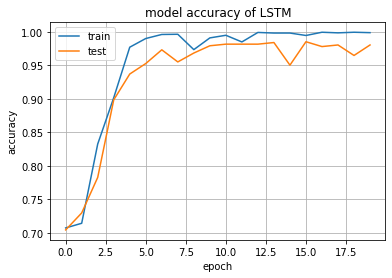

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy of LSTM')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.show()

#Confusion Matrix

In [ ]:
y_predict  = [1 if o>0.5 else 0 for o in model.predict(x_test_features)]

In [ ]:
cf_matrix =confusion_matrix(test_y,y_predict)

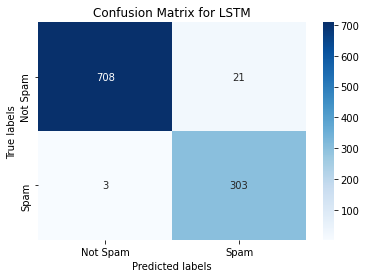

In [ ]:
ax= plt.subplot()
sns.heatmap(cf_matrix, annot=True, ax = ax,cmap='Blues',fmt=''); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix for LSTM'); 
ax.xaxis.set_ticklabels(['Not Spam', 'Spam']); ax.yaxis.set_ticklabels(['Not Spam', 'Spam']);

In [ ]:
tn, fp, fn, tp = confusion_matrix(test_y,y_predict).ravel()

In [ ]:
print("Precision: {:.2f}%".format(100 * precision_score(test_y, y_predict)))
print("Recall: {:.2f}%".format(100 * recall_score(test_y, y_predict)))
print("F1 Score: {:.2f}%".format(100 * f1_score(test_y,y_predict)))

Precision: 93.52%
Recall: 99.02%
F1 Score: 96.19%


In [ ]:
f1_score(test_y,y_predict)

0.961904761904762

#**Bi-LSTM**

In [ ]:
# Bilstm
model = tf.keras.Sequential()
model.add(Embedding(max_feature, embedding_vecor_length, input_length=max_len))
model.add(Bidirectional(tf.keras.layers.LSTM(64)))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 2000, 32)          1600000   
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               49664     
_________________________________________________________________
dense_2 (Dense)              (None, 16)                2064      
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 1,651,745
Trainable params: 1,651,745
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# BiLSTM
history = model.fit(x_train_features, train_y, batch_size=512, epochs=20, validation_split=0.2)

Epoch 1/20
7/7 [==============================] - 113s 16s/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0452 - val_accuracy: 0.9807
Epoch 2/20
7/7 [==============================] - 101s 14s/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0462 - val_accuracy: 0.9819
Epoch 3/20
7/7 [==============================] - 103s 15s/step - loss: 9.1391e-04 - accuracy: 1.0000 - val_loss: 0.0531 - val_accuracy: 0.9807
Epoch 4/20
7/7 [==============================] - 98s 14s/step - loss: 0.0017 - accuracy: 0.9997 - val_loss: 0.0715 - val_accuracy: 0.9722
Epoch 5/20
7/7 [==============================] - 100s 14s/step - loss: 8.3298e-04 - accuracy: 1.0000 - val_loss: 0.0752 - val_accuracy: 0.9722
Epoch 6/20
7/7 [==============================] - 101s 14s/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.0904 - val_accuracy: 0.9734
Epoch 7/20
7/7 [==============================] - 101s 14s/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.0970 - val_accuracy: 0.9746
Epoch 8/20
7/

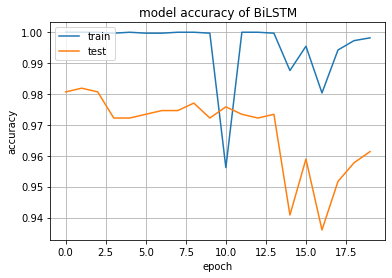

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy of BiLSTM')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.show()

#Confusion Matrix BiLSTM


In [ ]:
y_predict  = [1 if o>0.5 else 0 for o in model.predict(x_test_features)]

In [ ]:
cf_matrix =confusion_matrix(test_y,y_predict)

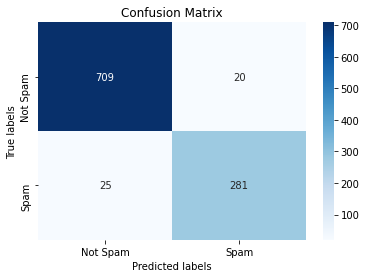

In [ ]:
ax= plt.subplot()
sns.heatmap(cf_matrix, annot=True, ax = ax,cmap='Blues',fmt=''); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Not Spam', 'Spam']); ax.yaxis.set_ticklabels(['Not Spam', 'Spam']);

In [ ]:
tn, fp, fn, tp = confusion_matrix(test_y,y_predict).ravel()

In [ ]:
print("Precision: {:.2f}%".format(100 * precision_score(test_y, y_predict)))
print("Recall: {:.2f}%".format(100 * recall_score(test_y, y_predict)))
print("F1 Score: {:.2f}%".format(100 * f1_score(test_y,y_predict)))

Precision: 93.36%
Recall: 91.83%
F1 Score: 92.59%


In [ ]:
f1_score(test_y,y_predict)

0.9258649093904449

#**GRU**

In [ ]:
#GRU
model = tf.keras.Sequential()
model.add(Embedding(max_feature, embedding_vecor_length, input_length=max_len))
# model.add(GRU(units=64, dropout=0.1,recurrent_dropout=0.1))
model.add(tf.keras.layers.GRU(64))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
print(model.summary())


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 2000, 32)          1600000   
_________________________________________________________________
gru (GRU)                    (None, 64)                18816     
_________________________________________________________________
dense_4 (Dense)              (None, 16)                1040      
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 1,619,873
Trainable params: 1,619,873
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# GRU
history = model.fit(x_train_features, train_y, batch_size=512, epochs=20, validation_split=0.2)

Epoch 1/20
7/7 [==============================] - 47s 6s/step - loss: 0.6740 - accuracy: 0.6919 - val_loss: 0.5881 - val_accuracy: 0.7041
Epoch 2/20
7/7 [==============================] - 45s 6s/step - loss: 0.5434 - accuracy: 0.7096 - val_loss: 0.4898 - val_accuracy: 0.7186
Epoch 3/20
7/7 [==============================] - 43s 6s/step - loss: 0.4089 - accuracy: 0.7458 - val_loss: 0.3367 - val_accuracy: 0.7657
Epoch 4/20
7/7 [==============================] - 44s 6s/step - loss: 0.2717 - accuracy: 0.8317 - val_loss: 0.2648 - val_accuracy: 0.8720
Epoch 5/20
7/7 [==============================] - 44s 6s/step - loss: 0.2129 - accuracy: 0.9544 - val_loss: 0.2289 - val_accuracy: 0.9094
Epoch 6/20
7/7 [==============================] - 45s 6s/step - loss: 0.1795 - accuracy: 0.9855 - val_loss: 0.2270 - val_accuracy: 0.9408
Epoch 7/20
7/7 [==============================] - 44s 6s/step - loss: 0.1395 - accuracy: 0.9946 - val_loss: 0.1675 - val_accuracy: 0.9650
Epoch 8/20
7/7 [==================

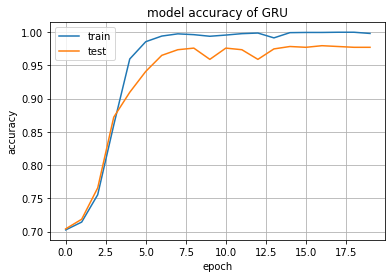

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy of GRU')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.show()

#Confusion Matrix GRU


In [ ]:
y_predict  = [1 if o>0.5 else 0 for o in model.predict(x_test_features)]

In [ ]:
cf_matrix =confusion_matrix(test_y,y_predict)

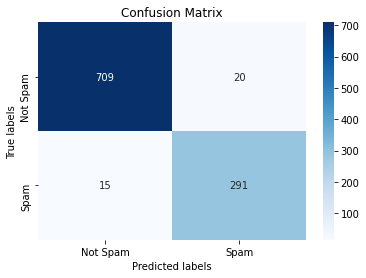

In [ ]:
ax= plt.subplot()
sns.heatmap(cf_matrix, annot=True, ax = ax,cmap='Blues',fmt=''); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Not Spam', 'Spam']); ax.yaxis.set_ticklabels(['Not Spam', 'Spam']);

In [ ]:
tn, fp, fn, tp = confusion_matrix(test_y,y_predict).ravel()

In [ ]:
print("Precision: {:.2f}%".format(100 * precision_score(test_y, y_predict)))
print("Recall: {:.2f}%".format(100 * recall_score(test_y, y_predict)))
print("F1 Score: {:.2f}%".format(100 * f1_score(test_y,y_predict)))

Precision: 93.57%
Recall: 95.10%
F1 Score: 94.33%


In [ ]:
f1_score(test_y,y_predict)

0.9432739059967585